In [2]:
import sys
import os
import pandas as pd

from items import *
from dataframe import *
from chronos import *

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

import calendar
from ggplot import *

In [3]:
# data open and auto parse

with open('data/review_items.jl', 'r') as f:
    raw = f.read()

reviews = as_dataframe(raw)

with open('data/hotel_items.jl','r') as f:
    raw = f.read()

hotels = as_dataframe(raw)

In [4]:
## show case hotels
hotels.head(3)

,batch_id,description,item_id,item_title,site_name,url
0,20160920153033,"The Merrion Hotel, Dublin: See 2,572 traveller...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nThe Merrion Hotel\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
1,20160920153033,"Aberdeen Lodge, Dublin: See 448 traveller revi...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAberdeen Lodge\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
2,20160920153033,"Ariel House, Dublin: See 1,231 traveller revie...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAriel House\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...


In [5]:
list(hotels.columns.values)

[u'batch_id', u'description', u'item_id', u'item_title', u'site_name', u'url']

In [6]:
hotels.description[0]

u'The Merrion Hotel, Dublin: See 2,572 traveller reviews, 611 candid photos, and great deals for The Merrion Hotel, ranked #1 of 151 hotels in Dublin and rated 5 of 5 at TripAdvisor.'

In [7]:
# number of hotels
hotels.shape[0]

157

In [8]:
# show case reviews
reviews.head(3)

,batch_id,item_id,rating,rating_percentage,review_id,review_text,review_title,site_name,timestamp_rating,url,user_id
0,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_419380945,\nWe were there for a very short time only but...,“Was fab!”,TripAdvisor,2016-09-17,https://www.tripadvisor.ie//ShowUserReviews-g1...,70C106C794E866B6CC8EB2CEAB5065AE
1,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_418509752,"\ngo early enjoy every minute, you will not re...",“wonderful”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,70A6646B5249D0F77159284DF06BC0FF
2,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,4,0.75,review_418590298,\nCool place. Neat mix of old castle and moder...,“good.”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,54208AF58C1AF1669E07392020DE0545


In [9]:
#summary of rating of dublin hotels
reviews.ix[:,['rating']].describe()

,rating
count,132496.000000
mean,4.102290
std,1.073778
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
reviews['timestamp_rating'].describe()

count                  132496
unique                   4272
top       2015-05-26 00:00:00
freq                      227
first     2001-11-28 00:00:00
last      2016-09-19 00:00:00
Name: timestamp_rating, dtype: object

In [ ]:
# reviewts = reviews.set_index('timestamp_rating')

review_value_array = reviewts[:]['review_text'].values
genre = ''.join(review_value_array)
genre = genre.strip('\t\r\n')
genre_lower = genre.lower()

import re
genre_nopunc = re.sub("[^a-zA-Z]", " ", genre_lower)

import nltk
nltk.download()
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk import word_tokenize
tokens_genre = word_tokenize(genre_nopunc)



words_in_genre = [w for w in tokens_genre if not w in stop_words]

    
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer = "word", \
                                  tokenizer = tokenizer, \
                                  preprocessor = None, \
                                  stop_words = stop_words, \
                                  max_features = 5000)
genre_word_count = count_vectorizer.fit_transform(genre_lower).toarray()

vocab = count_vectorizer.get_feature_names()

import numpy as np

distribution = np.sum(genre_word_count, axis=0)

# for tag,count in zip(vocab, distribution):
#     print count, tag





# transformer = TfidfVectorizer(stop_words=stop_words)
# sparse = transformer.fit_transform(cleanedRaw)


In [23]:
print((sparse).shape)

(365, 21595)


In [24]:
# x,y = sparse.nonzero()
# plt.scatter(x,y,cmap=sparse[x,y])

In [25]:
## questions (which implies my hypothesis revealed by tfidf):
##   - rank least similar top n dates, do they coincise with spike days? (hypothesis, flat days are norm)
##   - test


# example day no.150
arr = sparse.toarray()[150]
non_zero = arr != 0.0
idx_non_zero = [idx for idx in range(0,len(arr)) if non_zero[idx] != False]
print 'sample first 6 value of non zero tf-idf'
print sparse.toarray()[150][non_zero][1:6] # sample first 6 non zero tf-idf
print "\n sample idx arr of non_zero:"
print idx_non_zero[1:6]
print "\ntop 10 idx"
tti = sparse[150].toarray()[:,idx_non_zero].argsort()[::-1][0][:10]
print tti

sample first 6 value of non zero tf-idf
[ 0.01534555  0.02134714  0.02160143  0.01567334  0.03368267]

 sample idx arr of non_zero:
[47, 69, 118, 172, 250]

top 10 idx
[234 435 104 926 537 520 453 603 610 516]


In [26]:
words = transformer.get_feature_names()
[words[i] for i in tti]

[u'1900',
 u'2ch',
 u'1140pm',
 u'_after_',
 u'353',
 u'330',
 u'2minute',
 u'40minutes',
 u'411',
 u'327']

In [27]:
# new attempt
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(cleanedRaw)
feature_names = tf.get_feature_names() 
dense = tfidf_matrix.todense()
day = (pd.datetime(2014,8,5)-pd.datetime(2014,1,1)).days
targetday = dense[day].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(targetday)), targetday) if pair[1] > 0]
len(phrase_scores)

13047

In [28]:
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:5]

[(465304, 0.2717078095140637),
 (800351, 0.16730776447910325),
 (891914, 0.11376927984579022),
 (419716, 0.10440004503496043),
 (908535, 0.09503081022413065)]

In [29]:
feature_names[465304]

u'hotel'

In [30]:
print("top 20 words from ngrams(1,3)\n")
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
    print('{0: <20} {1}'.format(phrase, score))

top 20 words from ngrams(1,3)

hotel                0.271707809514
room                 0.167307764479
staff                0.113769279846
great                0.104400045035
stay                 0.0950308102241
dublin               0.0936923481083
breakfast            0.088338499645
good                 0.0816461890658
location             0.0816461890658
stayed               0.0776308027183
night                0.0762923406025
clean                0.0655846436758
rooms                0.0602307952125
friendly             0.0588923330966
bar                  0.0535384846333
city                 0.0522000225175
comfortable          0.0522000225175
nights               0.0495230982858
walk                 0.046974344241
july                 0.0446133871408


In [31]:
# without ngram 
tf = TfidfVectorizer(analyzer='word', min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix = tf.fit_transform(cleanedRaw)
feature_names = tf.get_feature_names() 
dense = tfidf_matrix.todense()
day = (pd.datetime(2014,8,5)-pd.datetime(2014,1,1)).days
targetday = dense[day].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(targetday)), targetday) if pair[1] > 0]
len(phrase_scores)
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:5]
tfidf_dict = {}
print("top 20 words without ngrams preprocessor, replace scaling tf with 1+log(tf)\n")
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
    print('{0: <20} {1}'.format(phrase, score))
    tfidf_dict[phrase] = score

top 20 words without ngrams preprocessor, replace scaling tf with 1+log(tf)

moist                0.0572316208653
orchids              0.0572316208653
parade               0.0550571986073
fryer                0.0543948786872
kitchenette          0.0543948786872
gluten               0.0516553894062
july                 0.050458267071
grandchildren        0.0503967151446
louder               0.0488766839118
scalded              0.0488766839118
sweat                0.0488766839118
optional             0.0475599729665
immensely            0.0463985516021
ensuite              0.0453759604827
climbing             0.0453596247891
scented              0.0453596247891
premises             0.044543763361
reduced              0.044543763361
hosted               0.044419801168
rolling              0.044419801168


In [32]:
print ("how to build a wordcloud based on the above list? :)")

how to build a wordcloud based on the above list? :)


well, this is my crude attempt (hack)


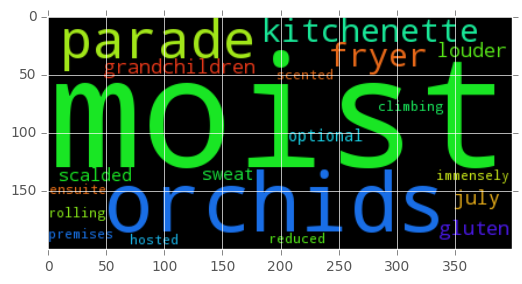

In [33]:
print ("well, this is my crude attempt (hack)")
faketxt = ""
for phrase,score in tfidf_dict.iteritems():
    amp = score*1000
    for i in range(0,int(amp)):
        faketxt += phrase+" "

joke = WordCloud().generate(faketxt)
plt.imshow(joke)

top 20 words without ngrams preprocessor, replace scaling tf with 1+log(tf)

passports            0.0653235057318
scotch               0.06171152759
relocate             0.0586527343819
emergency            0.0585462435167
brian                0.0552794386724
globus               0.0543416074902
1d                   0.0527025931142
depth                0.0512828142821
sharp                0.0512828142821
direction            0.050471433589
24th                 0.0502320725689
occasional           0.0500304805986
lasted               0.048910229945
hike                 0.0480305055152
mespil               0.0451180591592
introduction         0.0445991030533
lemon                0.0437418391423
rowdy                0.0432683000307
began                0.0430292997676
frills               0.0430292997676
well, this is my crude attempt (hack)


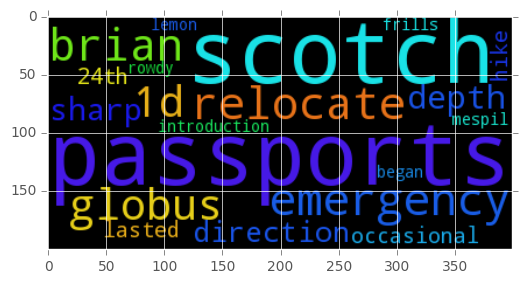

In [34]:
# without ngram 
tf = TfidfVectorizer(analyzer='word', min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix = tf.fit_transform(cleanedRaw)
feature_names = tf.get_feature_names() 
dense = tfidf_matrix.todense()
day = (pd.datetime(2014,5,28)-pd.datetime(2014,1,1)).days
targetday = dense[day].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(targetday)), targetday) if pair[1] > 0]
len(phrase_scores)
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:5]
tfidf_dict = {}
print("top 20 words without ngrams preprocessor, replace scaling tf with 1+log(tf)\n")
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
    print('{0: <20} {1}'.format(phrase, score))
    tfidf_dict[phrase] = score
print ("well, this is my crude attempt (hack)")
faketxt = ""
for phrase,score in tfidf_dict.iteritems():
    amp = score*1000
    for i in range(0,int(amp)):
        faketxt += phrase+" "

joke = WordCloud().generate(faketxt)
plt.imshow(joke)

top 20 words without ngrams preprocessor, replace scaling tf with 1+log(tf)

rap                  0.0996531240668
ultimate             0.0574425808503
photographs          0.0551189488995
van                  0.0533058952572
voiced               0.0532204033569
lowest               0.0516152059727
wynns                0.0510878485633
provision            0.0502247207513
camera               0.0489982258636
hazelbrook           0.0489982258636
august               0.0483719252316
forth                0.0480726150828
queried              0.0479010888005
ucf                  0.0469086076029
ultimately           0.0469086076029
advertise            0.0436789113071
hired                0.0436789113071
penn                 0.0436789113071
ryanair              0.0436789113071
horse                0.0421414970142
well, this is my crude attempt (hack)


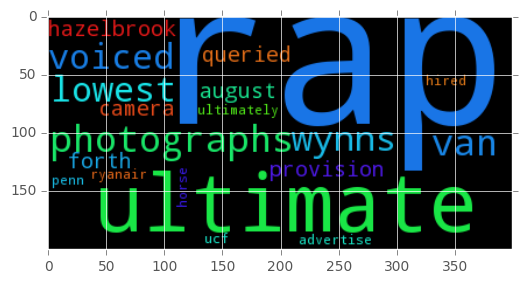

In [35]:
# without ngram 
tf = TfidfVectorizer(analyzer='word', min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix = tf.fit_transform(cleanedRaw)
feature_names = tf.get_feature_names() 
dense = tfidf_matrix.todense()
day = (pd.datetime(2014,9,1)-pd.datetime(2014,1,1)).days
targetday = dense[day].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(targetday)), targetday) if pair[1] > 0]
print ("lenght of phrase_scores: ", len(phrase_scores))
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:5]
tfidf_dict = {}
print("top 20 words without ngrams preprocessor, replace scaling tf with 1+log(tf)\n")
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
    print('{0: <20} {1}'.format(phrase, score))
    tfidf_dict[phrase] = score
print ("well, this is my crude attempt (hack)")
faketxt = ""
for phrase,score in tfidf_dict.iteritems():
    amp = score*1000
    for i in range(0,int(amp)):
        faketxt += phrase+" "

joke = WordCloud().generate(faketxt)
plt.imshow(joke)

In [91]:
# np.array([get_hoteldesc(url,hotels) for url in reviewByHotels.groups.keys()])
hdf = pd.DataFrame({'name':np.array([get_hoteldesc(url,hotels) for url in reviewByHotels.groups.keys()]),'review_mean_score':reviewByHotels.rating.mean(), 'review_count':reviewByHotels.size()}).reset_index()
hdf.head()

,item_id,name,review_count,review_mean_score
0,https://www.tripadvisor.ie/Hotel_Review-g18660...,Clyde Court Hotel,23,1.869565
1,https://www.tripadvisor.ie/Hotel_Review-g18660...,Dublin Citi Hotel,4,3.750000
2,https://www.tripadvisor.ie/Hotel_Review-g18660...,The Townhouse,721,4.080444
3,https://www.tripadvisor.ie/Hotel_Review-g18660...,The Regency Hotel Dublin,51,3.294118
4,https://www.tripadvisor.ie/Hotel_Review-g18660...,The Dean,219,3.721461


In [73]:
import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.metrics.pairwise import cosine_similarity

def get_sim_matrix(X):
    input_matrix = X.copy()

    min_max_scaler = preprocessing.MinMaxScaler()
    input_matrix = min_max_scaler.fit_transform(input_matrix)

    #print input_matrix
    hotel_sim_matrix = cosine_similarity(input_matrix)
    return hotel_sim_matrix

def getInputMatrix(h_df):
    X = np.array( [ [c,m] for m,c in zip(h_df.review_mean_score, h_df.review_count) ] )
    return X



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc453685350>]], dtype=object)

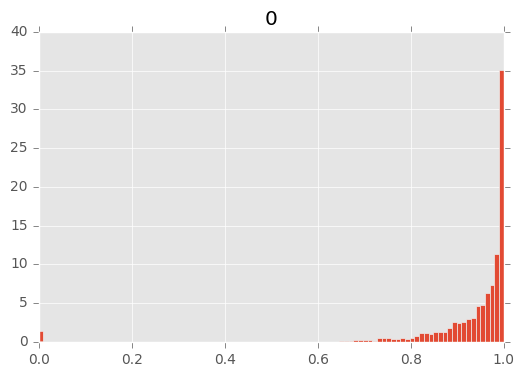

In [88]:
hotel_similarity = get_sim_matrix(getInputMatrix(hdf))
pd.DataFrame(hotel_similarity.flatten()).hist(bins=np.linspace(0,1,100), cumulative=False, normed=True)

In [90]:
pd.DataFrame(hotel_similarity)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,1.000000,0.999659,0.975962,0.999993,0.998265,0.680955,0.951619,0.922991,0.836456,0.747902,...,0.998760,0.897454,0.999628,0.963017,0.916802,0.999818,0.991372,0.832821,0.985496,0.999706
1,0.999659,1.000000,0.969940,0.999751,0.996388,0.661605,0.943273,0.912631,0.821864,0.730317,...,0.997121,0.885632,0.999999,0.955655,0.906064,0.999975,0.987612,0.818087,0.980730,0.998732
2,0.975962,0.969940,1.000000,0.975131,0.987101,0.824191,0.995713,0.984673,0.935789,0.874595,...,0.985600,0.972016,0.969653,0.998590,0.981797,0.971620,0.996109,0.933442,0.998791,0.980959
3,0.999993,0.999751,0.975131,1.000000,0.998036,0.678183,0.950451,0.921530,0.834379,0.745388,...,0.998565,0.895780,0.999724,0.961992,0.915286,0.999883,0.990869,0.830724,0.984848,0.999607
4,0.998265,0.996388,0.987101,0.998036,1.000000,0.722892,0.968060,0.944048,0.867272,0.785688,...,0.999958,0.921868,0.996287,0.977210,0.938724,0.996958,0.997370,0.863968,0.993778,0.999399
5,0.680955,0.661605,0.824191,0.678183,0.722892,1.000000,0.873039,0.910330,0.970928,0.995412,...,0.716564,0.934161,0.660723,0.853090,0.916750,0.666841,0.771074,0.972487,0.795354,0.698512
6,0.951619,0.943273,0.995713,0.950451,0.968060,0.873039,1.000000,0.996584,0.964387,0.915693,...,0.965735,0.989578,0.942882,0.999219,0.995156,0.945575,0.983687,0.962621,0.989962,0.958790
7,0.922991,0.912631,0.984673,0.921530,0.944048,0.910330,0.996584,1.000000,0.982937,0.945755,...,0.941002,0.998090,0.912149,0.992543,0.999875,0.915471,0.965470,0.981701,0.974908,0.932051
8,0.836456,0.821864,0.935789,0.834379,0.867272,0.970928,0.964387,0.982937,1.000000,0.989377,...,0.862698,0.992423,0.821193,0.953184,0.985718,0.825834,0.901076,0.999978,0.917325,0.849498
9,0.747902,0.730317,0.874595,0.745388,0.785688,0.995412,0.915693,0.945755,0.989377,1.000000,...,0.780016,0.964019,0.729513,0.899100,0.950765,0.735084,0.828462,0.990315,0.849702,0.763777


In [92]:

def centroid_score(sentences, threshold):
    wordhash = {}
    c = []
    for i in range(0,size(sentences)):
        for word in sentences[i]:
            if word in wordhash:
                wordhash[word]["tfidf"] = wordhash[word]["tfidf"] + idf[w]
            else:
                wordhash[word] = {}
                wordhash[word]["tfidf"] = idf[w]
            
    for word, value in wordhash.iteritems():
        if wordhash[word]["tfidf"] > threshold:
            wordhash[word]["centroid"] = wordhash[word]["tfidf"]
        else:
            wordhash[word]["centroid"] = 0
        
    for i in range(0, size(sentences)):
        c[i] = 0
        for word in sentences[i]:
            c[i] += wordhash[word]["centroid"]
            
    return c